In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from SEDkit import SEDs
from astrodbkit import astrodb
from IPython.display import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load the database
db = astrodb.Database('data/Filippazzo2015.db')

In [4]:
# Generate the SEDs
#L.RESET()
L = SEDs.GetData('data/SED_data.p')

# Get all the T dwarfs with a parallax and NIR spectrum
Q = "SELECT DISTINCT s.id \
FROM sources s \
JOIN parallaxes p ON s.id=p.source_id \
JOIN spectra sp1 ON sp1.source_id=s.id \
JOIN spectral_types spt on spt.source_id=s.id \
WHERE sp1.regime='NIR' \
AND sp1.instrument_id<>9 \
AND s.components IS NULL \
AND p.parallax IS NOT NULL \
AND spt.spectral_type BETWEEN 20 and 29"
results = db.query(Q, fmt='table')
print(len(results))

# Make the SEDs and get the Pan-STARRS y magnitude
#for r in results:
#    try:
#        sed = SEDs.MakeSED(int(r['s.id']), db, data_pickle=L)
#        sed.synthetic_mags(['PS_y'], data_pickle=L)
#    except:
#        pass

Data from data/SED_data.p loaded!
55


# CMDs

In [5]:
# Magnitudes
ps_y = 19.715
W2 = 15.37
W1 = 17.12
unc = 0.2

# Metadata
names = 'AllWISE J110125.95+540052.8, PSO J110125.687+540053.435'
ra = 165.358163
dec = 54.014678
source_id = 1629

# Make dict for new object
obj = {'AllWISE J110125.95+540052.8':{'SpT':25, 'SpT_unc':1, 'WISE_W1':W1, 'WISE_W1_unc':unc, 
                                      'WISE_W2':W2, 'WISE_W2_unc':unc, 'PS_y':ps_y, 'PS_y_unc':unc, 
                                      'min_age':500, 'gravity':False, 'binary':False, 'NYMG':False}}

<IPython.core.display.Javascript object>


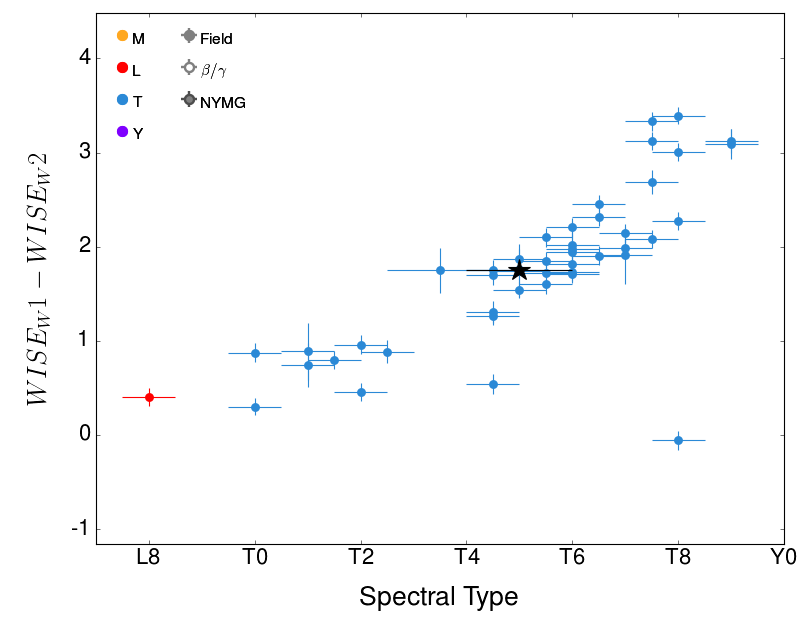



  -    M   L   T   Y  Total
----- --- --- --- --- -----
Field   0   1  44   0    45
 NYMG   0   0   0   0     0
low_g   0   0   1   0     1
Total   0   1  45   0    46


<IPython.core.display.Javascript object>


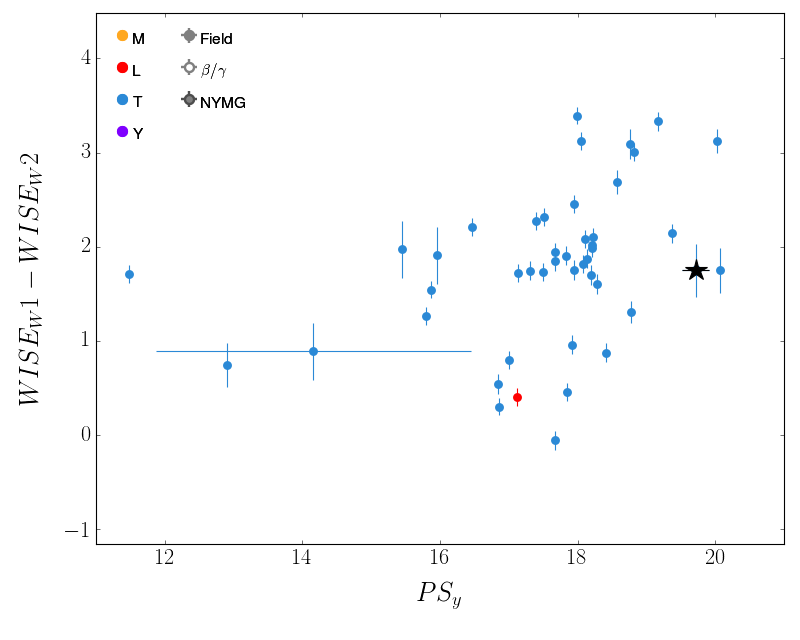



  -    M   L   T   Y  Total
----- --- --- --- --- -----
Field   0   1  43   0    44
 NYMG   0   0   0   0     0
low_g   0   0   1   0     1
Total   0   1  44   0    45


In [6]:
L.mag_plot('SpT', 'WISE_W1-WISE_W2', add_data=obj, identify=obj.keys(), xlims=(17,30))
L.mag_plot('PS_y', 'WISE_W1-WISE_W2', add_data=obj, identify=obj.keys(), xlims=(11,21))

<IPython.core.display.Javascript object>


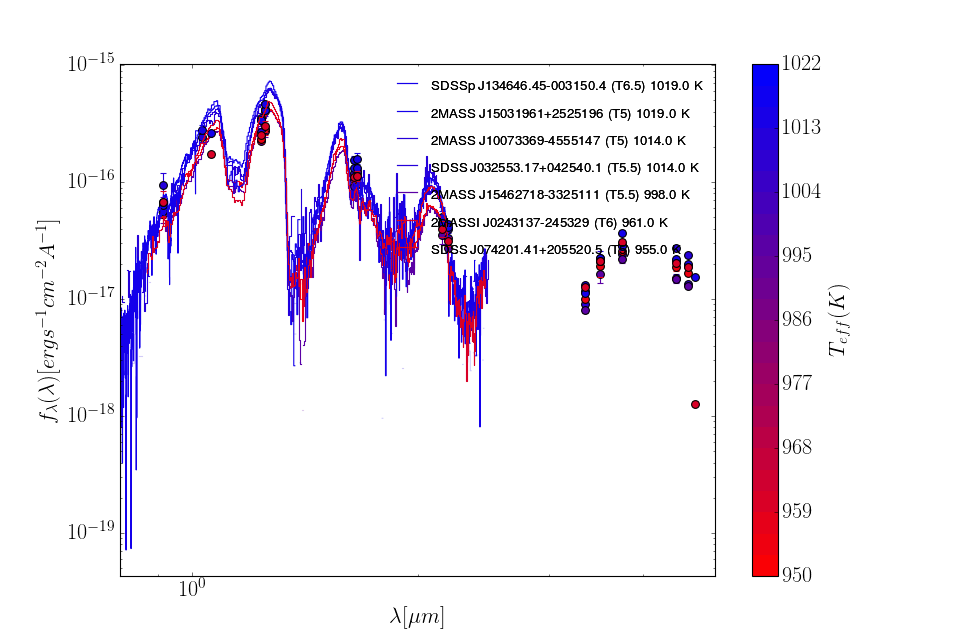

           col0                     col1          ...           col6          
------------------------- ----------------------- ... ------------------------
                        1                       2 ...                        7
SDSSp J134646.45-003150.4 2MASS J15031961+2525196 ... SDSS J074201.41+205520.5
                     T6.5                      T5 ...                       T5
                 1019.0 K                1019.0 K ...                  955.0 K


In [7]:
ax, result = L.spec_plot(spt=[24.5,26.5], groups=['fld'], teff=(950,1025), um=(0.8,5), legend=True)

<IPython.core.display.Javascript object>


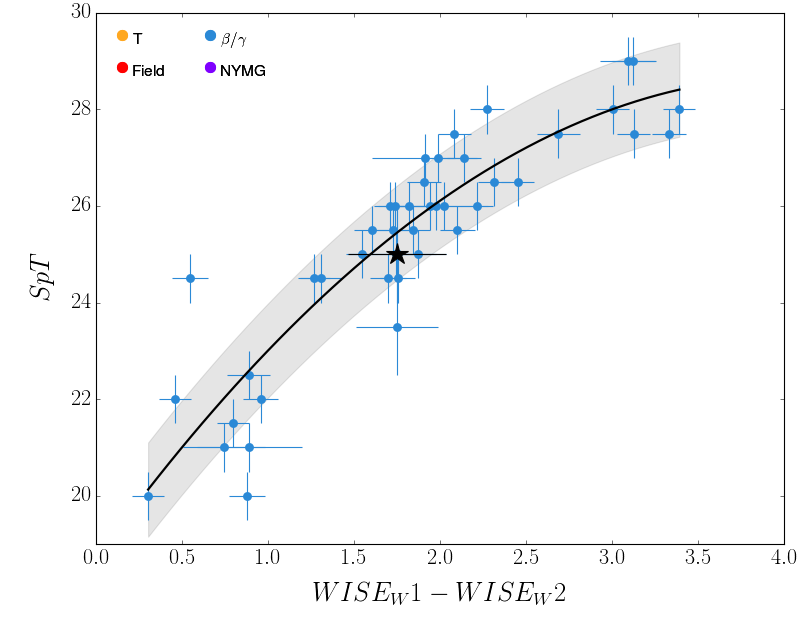

  P(x)               x               rms    $c_0$     $c_1$     $c_2$   
------- --------------------------- ----- --------- --------- ----------
SpT_all 0.3 < WISE_W1-WISE_W2 < 3.4 0.976 1.869e+01 4.919e+00 -6.057e-01



 T Field :
           Name            spt  WISE_W1-WISE_W2 WISE_W1-WISE_W2_unc SpT  SpT_unc Gravity Binary Age
-------------------------- ---- --------------- ------------------- ---- ------- ------- ------ ---
   2MASS J10073369-4555147 25.0           1.747     0.0994032192638 25.0     0.5   False  False    
          {epsilon} Ind~Ba 21.0           0.892      0.302988448625 21.0     0.5   False  False    
          {epsilon} Ind~Bb 26.0           1.975      0.302988448625 26.0     0.5   False  False    
   2MASS J15462718-3325111 25.5           1.844     0.0982344135219 25.5     0.5   False  False    
                  GU Psc b 23.5           1.751      0.238077718403 23.5     1.0   False  False    
  SDSS J083048.80+012831.1 24.5           1.698      0.104316825105

In [8]:
# Get polynomial fit of JHK as a function of W1-W2 for T dwarfs
L.mag_plot('WISE_W1-WISE_W2', 'SpT', add_data=obj, pop=['2MASS J07290002-3954043'], identify=obj.keys(), spt=['T'], xlims=(0,4), ylims=(19,30), fit=[(['fld','low-g','ymg'],2,'k','-')], verbose=True)

<IPython.core.display.Javascript object>


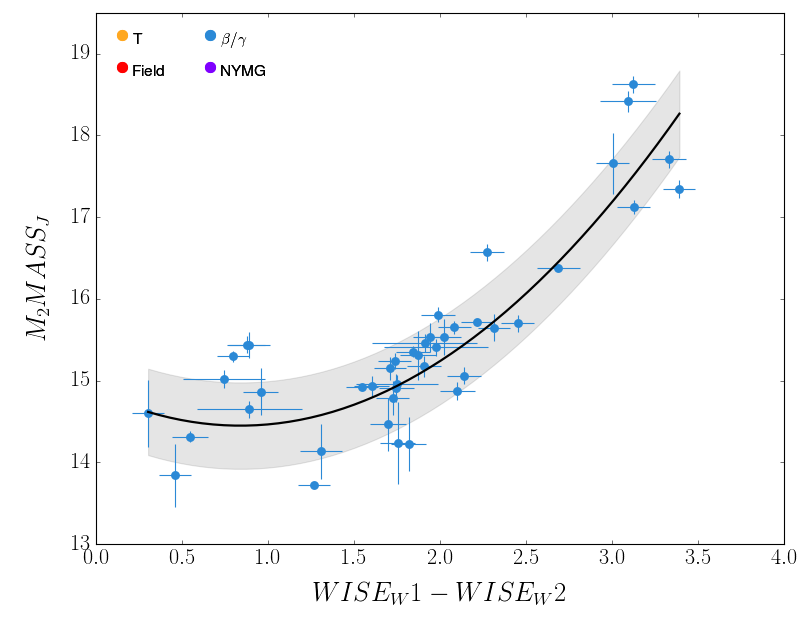

     P(x)                  x               rms    $c_0$     $c_1$      $c_2$  
------------- --------------------------- ----- --------- ---------- ---------
M_2MASS_J_all 0.3 < WISE_W1-WISE_W2 < 3.4 0.529 1.486e+01 -9.822e-01 5.856e-01



 T Field :
           Name            spt  WISE_W1-WISE_W2 WISE_W1-WISE_W2_unc M_2MASS_J M_2MASS_J_unc Gravity Binary Age
-------------------------- ---- --------------- ------------------- --------- ------------- ------- ------ ---
   2MASS J10073369-4555147 25.0           1.747     0.0994032192638     14.91         0.173   False  False    
          {epsilon} Ind~Ba 21.0           0.892      0.302988448625    14.646         0.105   False  False    
          {epsilon} Ind~Bb 26.0           1.975      0.302988448625    15.407         0.105   False  False    
   2MASS J15462718-3325111 25.5           1.844     0.0982344135219    15.354          0.07   False  False    
                  GU Psc b 23.5           1.751      0.238077718403    14.962      

In [9]:
L.mag_plot('WISE_W1-WISE_W2', 'M_2MASS_J', add_data=obj, xlims=(0,4), ylims=(13,19.5), pop=['2MASS J07290002-3954043'], identify=obj.keys(), spt=['T'], fit=[(['fld','low-g','ymg'],2,'k','-')], verbose=True)

<IPython.core.display.Javascript object>


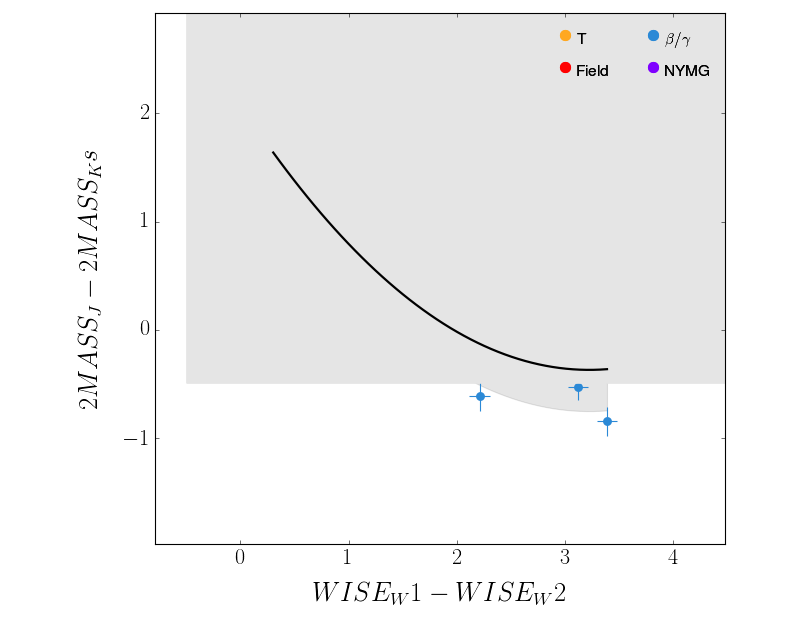

        P(x)                      x               rms  ...   $c_1$      $c_2$  
-------------------- --------------------------- ----- ... ---------- ---------
2MASS_J-2MASS_Ks_all 0.3 < WISE_W1-WISE_W2 < 3.4 0.381 ... -1.519e+00 2.354e-01



 T Field :
           Name           spt  WISE_W1-WISE_W2 WISE_W1-WISE_W2_unc ... 2MASS_J-2MASS_Ks_unc Gravity Binary Age
------------------------- ---- --------------- ------------------- ... -------------------- ------- ------ ---
  2MASS J10073369-4555147 25.0           1.747     0.0994032192638 ...        0.23888281646   False  False    
         {epsilon} Ind~Ba 21.0           0.892      0.302988448625 ...        0.13665284483   False  False    
         {epsilon} Ind~Bb 26.0           1.975      0.302988448625 ...        0.13665284483   False  False    
  2MASS J15462718-3325111 25.5           1.844     0.0982344135219 ...       0.188047866247   False  False    
 SDSS J083048.80+012831.1 24.5           1.698      0.104316825105 ...       0.1

In [16]:
L.mag_plot('WISE_W1-WISE_W2', '2MASS_J-2MASS_Ks', add_data=obj, pop=['2MASS J07290002-3954043','GU Psc b'], identify=obj.keys(), spt=['T'], fit=[(['fld','low-g','ymg'],2,'k','-')], verbose=True)

In [17]:
J = 17.5
deltaJH, deltaJK = 0.108, 0.121
H = J-deltaJH
K = J-deltaJK
print(J,H,K)

(17.5, 17.392, 17.379)


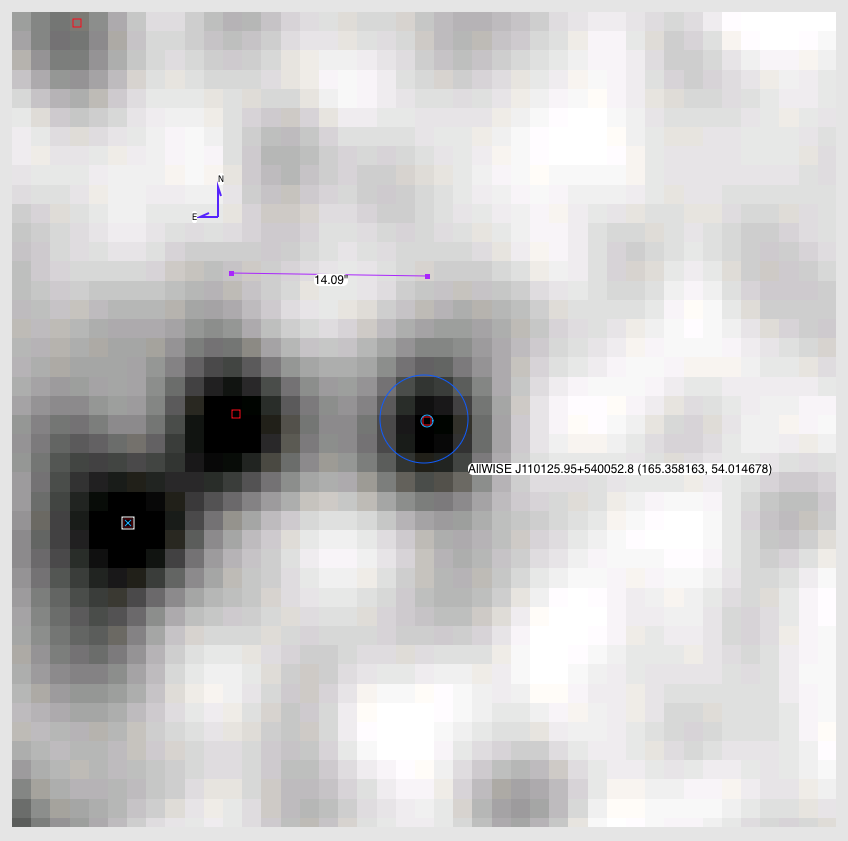

In [28]:
# W1 Finder Chart
Image(filename='data/W1101 finder (1arcsec).png', width=500) 